In [1]:
import os
import os.path as osp
import csv
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from natsort import natsorted
from tqdm import tqdm

In [2]:
img_pre = 'images'
label_pre = 'labels'

In [3]:
img_li, label_li = [], []

In [4]:
for x in os.listdir(img_pre):
    img_li.append(osp.join(img_pre, x))
    label_li.append(osp.join(label_pre, f'{osp.splitext(x)[0]}.txt'))

In [5]:
img_li[0], label_li[0]

('images\\00000_0806077-LGPT.jpg', 'labels\\00000_0806077-LGPT.txt')

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(img_li, label_li, test_size=0.2, random_state=42)

os.makedirs('dataset/train/images', exist_ok=True)
os.makedirs('dataset/train/labels', exist_ok=True)
os.makedirs('dataset/val/images', exist_ok=True)
os.makedirs('dataset/val/labels', exist_ok=True)

In [7]:
X_train[0], y_train[0], X_test[0], y_test[0]

('images\\NoFire (64).jpg',
 'labels\\NoFire (64).txt',
 'images\\00000_Fire 903.jpg',
 'labels\\00000_Fire 903.txt')

In [8]:
from shutil import copyfile

for i in range(len(X_train)):
    x = X_train[i]
    y = y_train[i]
    
    if os.path.splitext(x)[0].split("\\")[-1] != os.path.splitext(y)[0].split("\\")[-1]:
        print('[*] Not matched files')
        exit(0)
        
    copyfile(x, osp.join('dataset/train/images', x.split("\\")[-1]))
    copyfile(y, osp.join('dataset/train/labels', y.split("\\")[-1]))

In [9]:
for i in range(len(X_test)):
    x = X_test[i]
    y = y_test[i]
    
    if os.path.splitext(x)[0].split("\\")[-1] != os.path.splitext(y)[0].split("\\")[-1]:
        print('[*] Not matched files')
        exit(0)
        
    copyfile(x, osp.join('dataset/val/images', x.split("\\")[-1]))
    copyfile(y, osp.join('dataset/val/labels', y.split("\\")[-1]))

In [10]:
def yolobbox2bbox(x, y, w, h, width, height):
    x1, y1 = x-w/2, y-h/2
    x2, y2 = x+w/2, y+h/2
    return x1*width, y1*height, x2*width, y2*height

In [11]:
train_pre = 'dataset/train'
val_pre = 'dataset/val'

In [12]:
x, y = X_train[2], y_train[2]

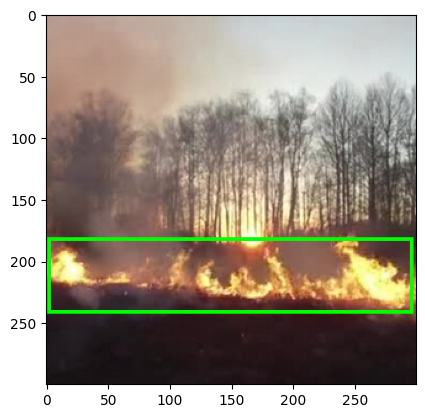

In [13]:
img = Image.open(x).convert('RGB')
w, h = img.size
label = open(y, 'r')
line = label.readline()[:-1].split(' ')

draw = ImageDraw.Draw(img)
draw.rectangle(yolobbox2bbox(float(line[1]), float(line[2]), float(line[3]), float(line[4]), w, h), outline=(0,255,0), width=3)

plt.imshow(img)
plt.show()

In [14]:
f = open('train.csv','w', newline='')
wr = csv.writer(f)

for x in os.listdir(osp.join(train_pre, 'images')):
    img_path = osp.join(train_pre, 'images', x)
    img = Image.open(img_path).convert('RGB')
    width, height = img.size
    
    y = osp.basename(x)
    y = osp.splitext(y)[0]
    y += '.txt'
    
    label = open(osp.join(train_pre, 'labels', y), 'r')
    cls, x, y, w, h = label.readline()[:-1].split(' ')
    x1, y1, x2, y2 = yolobbox2bbox(float(x), float(y), float(w), float(h), float(width), float(height))
    
    cls = "Fire" if cls == "0" else "None"
    wr.writerow([img_path, x1, y1, x2, y2, cls])


f.close()

In [15]:
f = open('val.csv','w', newline='')
wr = csv.writer(f)

for x in os.listdir(osp.join(val_pre, 'images')):
    img_path = osp.join(val_pre, 'images', x)
    img = Image.open(img_path).convert('RGB')
    width, height = img.size
    
    y = osp.basename(x)
    y = osp.splitext(y)[0]
    y += '.txt'
    
    label = open(osp.join(val_pre, 'labels', y), 'r')
    cls, x, y, w, h = label.readline()[:-1].split(' ')
    x1, y1, x2, y2 = yolobbox2bbox(float(x), float(y), float(w), float(h), float(width), float(height))
    
    cls = "Fire" if cls == "0" else "None"
    wr.writerow([img_path, x1, y1, x2, y2, cls])


f.close()